In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
def ising_2d_energy(spins, bu, J):
    energy = -np.sum(spins) * bu
    spins_u = np.roll(spins, -1, axis=0)
    spins_l = np.roll(spins, -1, axis=1)
    spins_list = [spins_u, spins_l]
    for rolled in spins_list:
        energy -= np.sum(spins*rolled) *J
    return energy

In [3]:
def E_change(spins, row, column, bu, J):
    delta_E = 0
    si = spins[row, column]
    last_row = spins.shape[0]-1
    last_column = spins.shape[1]-1
    if row == 0:
        su = spins[last_row, column] 
        sd = spins[row+1, column] 
    elif row == last_row:
        sd = spins[0, column]
        su = spins[row-1, column]
    else:
        su = spins[row-1, column]
        sd = spins[row+1, column]
    if column == 0:
        sl = spins[row, last_column]
        sr = spins[row, column+1] 
    elif column == last_column:
        sr = spins[row, 0]
        sl = spins[row,column-1]
    else:
        sr = spins[row, column+1]
        sl = spins[row,column-1]

        delta_E += -2*J*si*(su+sd+sl+sr) -2*bu*si 

    return delta_E

In [4]:
def MC_ising(inispins, n, kbT, bu, J):
    spins = np.copy(inispins)
    energy = ising_2d_energy(spins, bu ,J)
    mag = []
    mag.append (np.sum(spins)/np.size(spins))
    for i in range (n):
        row = np.random.randint(0, spins.shape[0])
        col = np.random.randint(0, spins.shape[1])
        spins[row,col] *= -1 # Flip it
        new_e = energy + E_change(spins, row, col, bu, J) 
        if new_e <= energy:
            energy = new_e
        else: 
            BF = np.exp((energy - new_e)/kbT) 
            if random.random() < BF:
                energy = new_e
            else:
                spins[row,col] *= -1 
        mag.append(np.sum(spins)/np.size(spins))
    plt.imshow (spins, cmap = "hot")
    plt.title("Monte-Carlo Ising model: kbT = %.1f, Iteration = %i, Bμ = %i, J = %i" % (kbT, n, bu, J))
    plt.show()
    fig, ax = plt.subplots()
    ax.plot (mag)
    ax.set_title("Monte-Carlo Ising model: kbT = %.1f, Iteration = %i, Bμ = %i, J = %i" % (kbT, n, bu, J))
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Magnetization")
    plt.show()
    return spins, mag

In [5]:
def checkerboard(w,h):
    re = np.r_[w*[1,-1]]
    ro = np.r_[w*[-1,1]]
    board = np.row_stack(h*(re,ro))
    return board

In [6]:
#For c and d

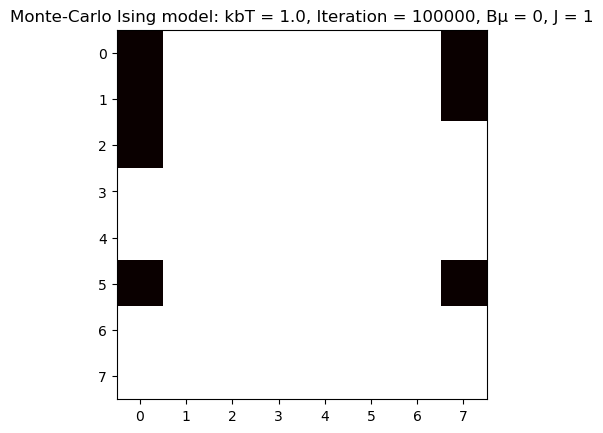

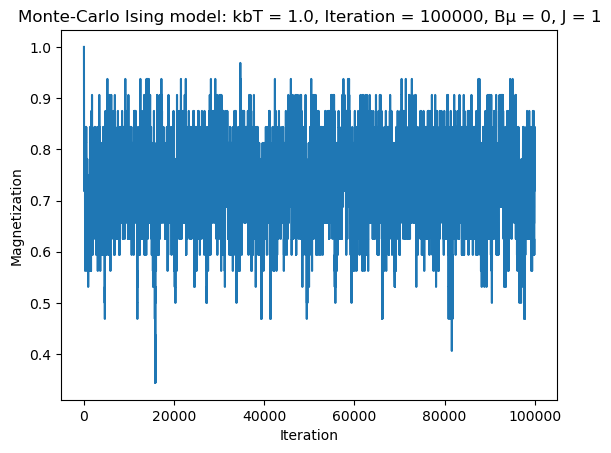

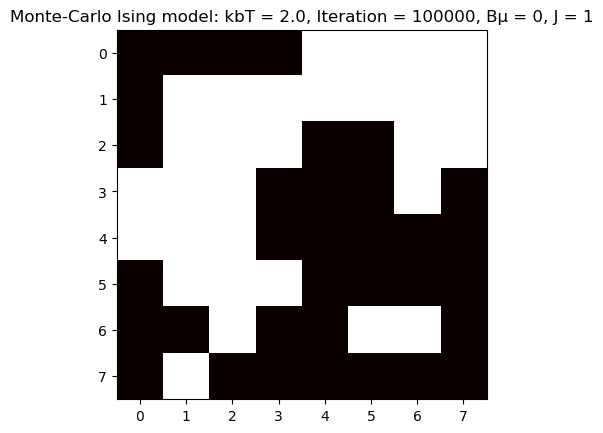

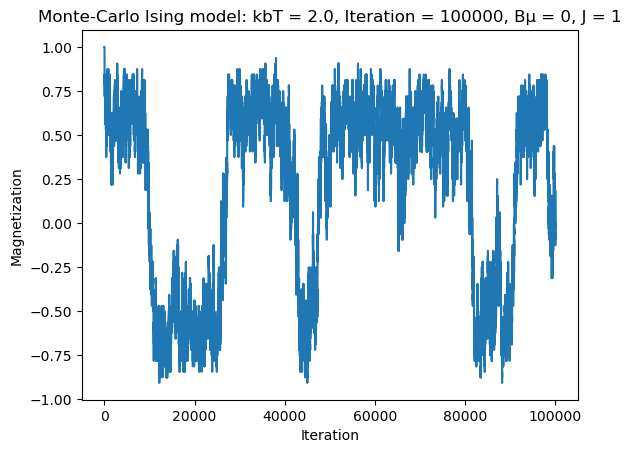

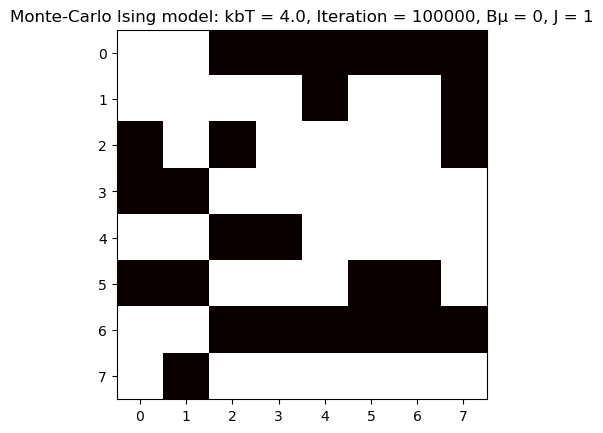

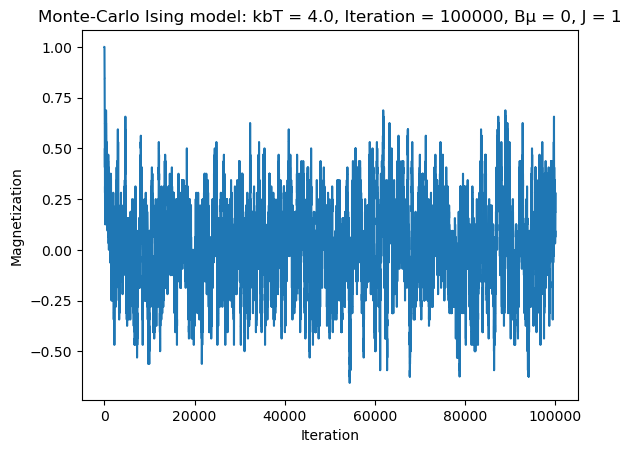

In [7]:
currspin = np.ones((8, 8))
ising1, mag1 = MC_ising (currspin, 100000, 1.0, 0, 1) 
ising2, mag2 = MC_ising (currspin, 100000, 2.0, 0, 1) 
ising3, mag3 = MC_ising (currspin, 100000, 4.0, 0, 1) 

In [8]:
#for part e

"I expect the average magnetization to be zero without the prescence of a magnetic field so the spins will be in any direction"
"In the simulation, it seems that the direction of spins goes to the lower temperatures"

'In the simulation, it seems that the direction of spins goes to the lower temperatures'

In [9]:
#for part f

In [ ]:
ising4, mag4 = MC_ising (currspin, 10000000, 2.0, 0, 1)

In [ ]:
#for part g

In [ ]:
spin_check = checkerboard(50,50)
ising5, mag5 = MC_ising (spin_check, 100000, 1.0, 0, 1)
ising6, mag6 = MC_ising (spin_check, 100000, 2.0, 0, 1)
ising7, mag7 = MC_ising (spin_check, 100000, 4.0, 0, 1)